In [1]:
from standardInclude import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
df = pandas.read_csv("./run2Trends_11.csv", parse_dates=True)
df = df.loc[df['quality'] == 'Y']
#df = df.loc[df['quality'] != 'N']
#df = df.loc[df['quality'] != 'C']
df = df.loc[df['runType'] == " P"]
#df = df.loc[df['runType'] != "X"].loc[df['runType'] != " I"]
df = df.sort_values(by=['startTime'], ascending=True)

#df = df.loc[df['nlCtagPerFill_Mark'] > 100]
#df = df.sample(100)
df.head()

,run,startTime,stopTime,nEvents,quality,AvgTemp_AllCalos,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,...,t0_tubea_total_integral,t0_tubeb_total_integral,ibms1x_centroid,ibms1y_centroid,ibms2x_centroid,ibms2y_centroid,ibms1x_total_integral,ibms1y_total_integral,ibms2x_total_integral,ibms2y_total_integral
2837,24376,2019-03-26 17:17:43,2019-03-26 20:01:04,135715.0,Y,38.283933,NaN,NaN,NaN,1.085579,...,1.811154e+07,2.015959e+07,9.42528,7.06583,8.77788,7.48696,4.979098e+07,4.981594e+07,7.396418e+07,8.576739e+07
2836,24377,2019-03-26 20:01:25,2019-03-26 22:40:26,129232.0,Y,38.186626,NaN,NaN,NaN,1.075511,...,1.970759e+07,2.193608e+07,9.52851,7.15526,8.91188,7.62644,5.388915e+07,5.389136e+07,7.986628e+07,9.264326e+07
2835,24378,2019-03-26 22:40:45,2019-03-26 22:40:26,19459.0,Y,NaN,1605447.0,557.640500,24.0,1.060443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2834,24379,2019-03-26 23:19:29,2019-03-26 23:06:09,3961.0,Y,NaN,1023459.0,570.489967,15.0,1.059009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2833,24380,2019-03-26 23:35:11,2019-03-26 23:26:11,12752.0,Y,NaN,3301574.0,579.732046,48.0,1.058188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,run,nEvents,AvgTemp_AllCalos,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,AvgGain_Calo2,AvgGain_Calo3,AvgGain_Calo4,...,t0_tubea_total_integral,t0_tubeb_total_integral,ibms1x_centroid,ibms1y_centroid,ibms2x_centroid,ibms2y_centroid,ibms1x_total_integral,ibms1y_total_integral,ibms2x_total_integral,ibms2y_total_integral
count,826.000000,826.000000,647.000000,4.360000e+02,436.000000,436.000000,727.000000,727.000000,727.000000,727.000000,...,3.150000e+02,3.150000e+02,315.000000,315.000000,315.000000,315.000000,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02
mean,25759.469734,81435.870460,39.395637,3.569357e+06,518.673871,57.172018,1.195930,1.221229,1.267903,1.212607,...,1.702723e+07,1.927774e+07,9.878635,7.168229,9.136372,7.528169,4.547418e+07,4.599209e+07,6.579124e+07,7.843677e+07
std,862.212885,50763.960077,0.854227,3.441820e+06,158.459588,51.871284,0.113334,0.105302,0.121913,0.117802,...,9.496524e+05,1.117015e+06,0.162243,0.117419,0.101444,0.105046,3.291218e+06,3.397993e+06,5.041224e+06,5.237101e+06
min,24376.000000,24.000000,37.540522,1.000000e+00,0.006068,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.470836e+07,1.643306e+07,9.285250,6.844070,8.751570,7.256990,3.634154e+07,3.698170e+07,5.153555e+07,6.355445e+07
25%,24875.500000,29327.000000,38.803559,5.850215e+05,521.722726,11.500000,1.120249,1.147203,1.183651,1.127559,...,1.644592e+07,1.862246e+07,9.808330,7.091070,9.091360,7.456525,4.347997e+07,4.379677e+07,6.276902e+07,7.541090e+07
50%,26003.500000,115376.000000,39.334841,2.910544e+06,562.471544,49.000000,1.175987,1.205956,1.243878,1.192516,...,1.684941e+07,1.907481e+07,9.893250,7.160230,9.145450,7.518460,4.452532e+07,4.503559e+07,6.433477e+07,7.681142e+07
75%,26493.750000,123766.000000,39.881406,5.901683e+06,600.675013,92.000000,1.239687,1.281579,1.338122,1.284819,...,1.750214e+07,1.972911e+07,9.984665,7.236655,9.202800,7.594675,4.661328e+07,4.726227e+07,6.777005e+07,8.060247e+07
max,27440.000000,175194.000000,42.333751,2.692298e+07,731.982815,432.000000,1.681117,1.659344,1.614691,1.608741,...,2.100787e+07,2.337763e+07,10.336350,7.596510,9.447670,7.833670,5.804045e+07,5.802965e+07,8.490583e+07,9.857948e+07


In [4]:
print(df.columns)

Index(['run', 'startTime', 'stopTime', 'nEvents', 'quality',
       'AvgTemp_AllCalos', 'ctag', 'ctagPerFill', 'nSubRuns', 'AvgGain_Calo1',
       'AvgGain_Calo2', 'AvgGain_Calo3', 'AvgGain_Calo4', 'AvgGain_Calo5',
       'AvgGain_Calo6', 'AvgGain_Calo7', 'AvgGain_Calo8', 'AvgGain_Calo9',
       'AvgGain_Calo10', 'AvgGain_Calo11', 'AvgGain_Calo12', 'AvgGain_Calo13',
       'AvgGain_Calo14', 'AvgGain_Calo15', 'AvgGain_Calo16', 'AvgGain_Calo17',
       'AvgGain_Calo18', 'AvgGain_Calo19', 'AvgGain_Calo20', 'AvgGain_Calo21',
       'AvgGain_Calo22', 'AvgGain_Calo23', 'AvgGain_Calo24', 'runType',
       'duration', 'dqmCtagPerFill', 'nlCtagPerFill_Mark', 'nlFrac_Mark',
       'AvgTemp_Calo1', 'AvgTemp_Calo2', 'AvgTemp_Calo3', 'AvgTemp_Calo4',
       'AvgTemp_Calo5', 'AvgTemp_Calo6', 'AvgTemp_Calo7', 'AvgTemp_Calo8',
       'AvgTemp_Calo9', 'AvgTemp_Calo10', 'AvgTemp_Calo11', 'AvgTemp_Calo12',
       'AvgTemp_Calo13', 'AvgTemp_Calo14', 'AvgTemp_Calo15', 'AvgTemp_Calo16',
       'AvgTemp_Calo

In [5]:
dfi = df.sample(100, random_state=12345)

In [6]:
runs_dataset = [x for x in dfi['run'].values]
print(runs_dataset)

[27193, 25034, 26328, 26066, 24754, 25947, 24705, 26174, 26335, 25007, 26687, 26153, 24736, 27207, 27209, 24847, 26511, 25040, 25003, 27029, 27437, 27041, 26086, 26177, 26597, 24380, 24775, 26308, 24636, 26299, 26508, 24972, 26322, 24584, 26210, 26788, 25955, 25041, 25963, 24742, 26076, 26092, 26772, 24868, 24892, 24869, 26510, 26180, 24796, 25989, 25017, 24893, 26619, 26059, 27019, 26573, 26199, 26157, 26338, 26797, 24387, 25959, 26341, 25948, 26493, 24444, 26146, 24750, 26771, 26096, 26611, 25036, 26486, 26175, 26267, 24774, 24984, 24759, 24696, 26523, 24854, 24376, 26774, 24786, 26074, 26514, 24747, 24605, 26287, 25002, 26715, 24768, 24630, 25916, 26755, 24758, 24587, 26605, 24585, 25932]


In [7]:
dataset = 'samweb -e gm2 create-definition nearline_100ProductionRuns_Binney_LaBounty_100Subruns " ( '
for i, runi in enumerate(runs_dataset):
    dataset+= "( run_number >= "+str(runi)+" and run_number <= "+str(runi)+" ) or "
dataset = dataset[:-3]+" "
dataset += ' ) and ( file_name like %_000%.mid ) and data_tier raw " '

#print(dataset)

In [8]:
df2 = pandas.read_csv("./run2Trends_timeOnly.csv", parse_dates=True)
#df2.sort_values(by=['startTime'])
df2 = df2.sort_values(by=['startTime'], ascending=True)

df2['stopTime'] = df2['endTime']
#df = df.loc[df['quality'] == 'Y']
#df = df.loc[df['runType'] == " P"]
#df = df.sample(100)
df2.head()

,N6,N6_var,NQ,NQ_var,S6,S6_var,SQ,SQ_var,deltaMagnetCycle,dipole,...,feedbackCurrent_var,magnetCycleSimon,startTime,trolleyRun,trolleyRunSimon,yokeTemp,yokeTemp_Gradient,yokeTemp_Gradient_var,yokeTemp_var,stopTime
36,315.69,4.14,-1499.92,14.16,-1738.92,36.50,-73.41,4.72,NaN,48376.72,...,0.01640,NaN,2019-04-08 21:52:13,NaN,NaN,16.270,-0.411,0.006,0.003,2019-04-08 23:21:21
9,315.60,4.26,-1498.44,14.79,-1740.34,38.20,-73.37,4.85,NaN,48370.46,...,0.02067,NaN,2019-04-09 00:50:53,NaN,NaN,16.278,-0.410,0.006,0.003,2019-04-09 02:32:15
0,316.30,5.39,-1494.87,18.62,-1741.10,47.74,-71.54,6.12,NaN,48363.03,...,0.02347,NaN,2019-04-10 02:48:49,NaN,NaN,16.375,-0.419,0.004,0.002,2019-04-10 04:18:09
31,317.81,6.60,-1492.45,22.43,-1738.65,57.44,-69.22,8.30,NaN,48368.40,...,0.01333,NaN,2019-04-14 03:37:37,NaN,NaN,16.502,-0.397,0.003,0.001,2019-04-14 05:22:25
44,317.88,6.33,-1490.84,21.73,-1735.97,57.47,-69.00,7.60,NaN,48373.35,...,0.04421,NaN,2019-04-14 10:25:38,NaN,NaN,16.506,-0.387,0.003,0.002,2019-04-14 12:22:21


In [9]:
print(df2.columns)

Index(['N6', 'N6_var', 'NQ', 'NQ_var', 'S6', 'S6_var', 'SQ', 'SQ_var',
       'deltaMagnetCycle', 'dipole', 'dipole_var', 'endTime',
       'feedbackCurrent_mA', 'feedbackCurrent_var', 'magnetCycleSimon',
       'startTime', 'trolleyRun', 'trolleyRunSimon', 'yokeTemp',
       'yokeTemp_Gradient', 'yokeTemp_Gradient_var', 'yokeTemp_var',
       'stopTime'],
      dtype='object')


In [10]:
def plotVariableVsDuration(ax, startTimes, endTimes, value, fmt="b-"):
    for i in range(len(startTimes.values)):
        ax.plot( [startTimes.values[i], endTimes.values[i]], [value.values[i], value.values[i]], fmt)

def makeTrendPlot(axi, runplots, df):
        toPlot, title, ylims, duration, numeric = runplots
        axi.set_title(title)
        if(len(ylims) == 2):
            axi.set_ylim(ylims[0], ylims[1])

        if(numeric):
            yaxis = pandas.to_numeric(df[toPlot], errors='coerce')
            axi2 = axi.twinx()            
        else:
            yaxis = df[toPlot]

        colors = {'N':'red', 'Y':'blue', 'T':'green', 'C':'black'}
        
        if(duration):
            plotVariableVsDuration(axi, pandas.to_datetime(df['startTime']), 
                                   pandas.to_datetime(df['stopTime']), 
                                   yaxis,'b.-')
        elif('Time' in plotX):
            try:
                axi.scatter(pandas.to_datetime(df[plotX]), yaxis,
                          c=df['quality'].apply(lambda x: colors[x]) )
            except:
                axi.plot(pandas.to_datetime(df[plotX]), yaxis, "b.")
                
        else:
            try:
                axi.scatter(pandas.to_numeric(df['plotX']), yaxis,
                          c=df['quality'].apply(lambda x: colors[x]) )
            except:
                axi.plot(pandas.to_numeric(df[plotX]), yaxis, "b.")
            
            
        if(numeric):
            axi.callbacks.connect("ylim_changed", convertAxToPercentageFromMean(axi, axi2, yaxis))
            
def getPercentDiff(x, y):
    return (x-y)/x *100.
            
def convertAxToPercentageFromMean(axi, axi2, yvals):
    y1, y2 = axi.get_ylim()
    mean = yvals.mean()
    stdev = yvals.std()
    #print(y1, y2, mean, y1/mean*1.0, y2/mean*1.0)
    #axi2.set_ylim( getPercentDiff(y1, mean) , getPercentDiff(y2, mean) ) #percent difference from mean
    if(stdev != 0):
        #print(y1, y2, stdev, (y1 - mean) / stdev , ( y2 - mean) / stdev)
        axi2.set_ylim( (y1 - mean) / stdev , ( y2 - mean) / stdev ) #std deviations from mean
    else:
        #print("NaN")
        axi2.set_ylim( -1 , 1 ) #std deviations from mean
    axi2.figure.canvas.draw()   

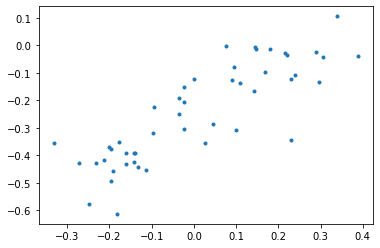

In [11]:
plt.plot(df['trackerY'],df['caloYpos'],".")
plt.show()

---
# How long was the run?

In [12]:
ding = (pandas.to_datetime(df['stopTime']) - pandas.to_datetime(df['startTime'])).loc[ pandas.to_datetime(df['stopTime']) > pandas.to_datetime(df['startTime']) ]
print(ding.head())
print(ding.sum())

2837   02:43:21
2836   02:39:01
2832   00:10:21
2831   00:03:02
2830   00:17:50
dtype: timedelta64[ns]
29 days 03:02:32


826.0


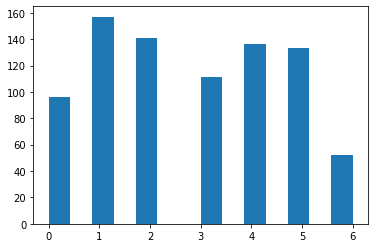

In [13]:
ding = plt.hist(pandas.to_datetime(df['startTime']).dt.dayofweek,bins=14)
print(ding[0].sum())

In [14]:
uniqueDays = 0
previousday = -1
for i, day in df.iterrows():
    dayi = pandas.to_datetime(day['startTime']).dayofweek
    if(dayi == previousday):
        continue
    else:
        previousday = dayi
        uniqueDays += 1
print(uniqueDays, "days")

53 days


In [15]:
df['numberOfSubruns'].sum() * 6. / 60. / 60. / 24.

18.319791666666667

In [16]:
nrun2 = df['numberOfSubruns'].sum()
print(nrun2)

263805


In [17]:
nrun1 = 23560 + 39236 + 75512 + 27556
print(nrun1)

165864


In [18]:
nrun2/nrun1

1.5904897988713644

---

# Lets now see if we can divide this into datasets

These should have a large number of subruns and be bookended by a pair of trolley runs

In [19]:
nsubruns_min = 53670*2 #this is twice the number in the 9day dataset
nsubruns_9day = 53670
nsubruns_60h = 27292
nsubruns_endgame = 115352
print("Optimum subruns:", nsubruns_min)

Optimum subruns: 107340


In [20]:
print("Number of evenly spaced datasets:", df['numberOfSubruns'].sum() / nsubruns_min)

Number of evenly spaced datasets: 2.457657909446618


In [21]:
#Dave wants Run2-A, Run2-B... This is a compromise.
datasetNames = ["A",
                "B",
                "C",
                "D",
                "E",
                "F",
                "G",
                "H",
                "Isabella",
                "Julia",
                "Kennedy",
                "Layla",
                "Mia",
                "Nora",
                "Olivia",
                "Penelope",
                "Quinn",
                "Riley",
                "Sophia",
                "Taylor",
                "Unique",
                "Victoria",
                "Willow",
                "Ximena",
                "Yaretzi",
                "Zoey",
                "Alexander",
                "Benjamin",
                "Carter",
                "Daniel",
                "Elijah",
                "Finn",
                "Gabriel",
                "Henry",
                "Isaac",
                "James",
                "Kayden",
                "Liam",
                "Mason",
                "Noah",
                "Oliver",
                "Parker",
                "Quinn",
                "Ryan",
                "Samuel",
                "Thomas",
                "Uriel",
                "Vincent",
                "William",
                "Xavier",
                "Yusuf",
                "Zachary"]

In [22]:
datasetNames = ['A',"B", 'C', 'D', "E", "F", "G", "H"]

In [23]:
trolleyEquivRuns = [] #these are runs just before a trolley run

In [24]:
#This function will return the datetime in items which is the closest to the date pivot.
def nearest(items, pivot):
    #print(type(items), type(pivot))
    return min(items, key=lambda x: abs(x - pivot))

In [25]:
trolleyTimes = pandas.to_datetime(df2['startTime'].loc[df2['trolleyRunSimon'] > 0])
#print(trolleyTimes)

df['date'] = pandas.to_datetime(df['startTime'])  

for trolleyTime in trolleyTimes:
    trolleyRuni = 0
    previousRun = 0
    previousTime = -1
    foundTime = False
    
    dfi = df.loc[df['date'] > trolleyTime]
    try:
        nearestTime = nearest(pandas.to_datetime(dfi['startTime']), pandas.to_datetime(trolleyTime))
        #print(nearestTime, trolleyTime)
        equivrun = dfi.loc[dfi['date'] == nearestTime]['run'].values[0] 
        trolleyEquivRuns.append( equivrun )
    except:
        print("No equiv run for", trolleyTime)


No equiv run for 2019-07-03 15:32:00


In [26]:
print(trolleyEquivRuns)
print(len(trolleyEquivRuns), len(trolleyTimes))

[24376, 24376, 24575, 24575, 24575, 24684, 24831, 24920, 24995, 25894, 25894, 25916, 25964, 26053, 26137, 26264, 26459, 26459, 26459, 26563, 26675, 26675, 26755, 26996, 26996, 26996, 27166, 27166, 27415, 27415]
30 31


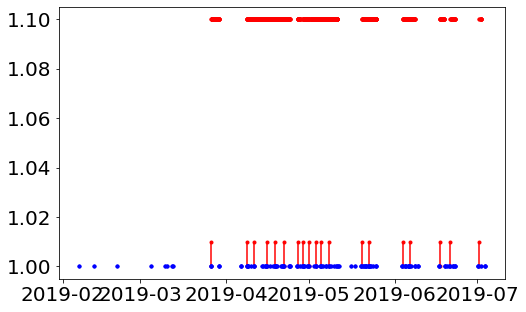

In [27]:
noint()
fig,ax = plt.subplots(figsize=(8,5))
for i, entry in df.iterrows():
    if(entry['run'] in trolleyEquivRuns):
        plt.plot([pandas.to_datetime(entry['startTime']), pandas.to_datetime(entry['startTime'])], [1,1.01], "r.-" )
plt.plot([pandas.to_datetime(df['startTime']), pandas.to_datetime(df['startTime'])], [1.1,1.1], "r." )
plt.plot([pandas.to_datetime(df2['startTime']), pandas.to_datetime(df2['startTime'])], [1,1], "b." )

plt.show()

In [28]:
breakRuns = [] #these runs will mark the end of a dataset, manually chosen, no matter other metrics

In [29]:
#divide by the large periods of 5/14 running
breakRuns += [  24500,
                25050,
                26416,
                26625,
                #26670,
                #26750,
                26900,
                27100,
                27415
             ]

In [30]:
totalSubrunsInDataset = 0
datasets = []
startRun = -1
previousRun = -1
for i, entry in df.iterrows():
    runi = entry['run']
    nsubruns = entry['numberOfSubruns']
    runStartTime = entry['startTime']
    
    if(runi == df['run'].min() ):
        startRun = runi
        
    breakHere = False
    for x in breakRuns:
        if(previousRun < x and runi > x):
            breakHere = True
            
    if((totalSubrunsInDataset >= nsubruns_min and ( (runi in trolleyEquivRuns) ) or (runi == df['run'].max() )) 
       or (runi in breakRuns or breakHere)):
        #append to optimum vector
        #print(len(datasets))
        namei = datasetNames[len(datasets)]
        print(namei)
        datasets.append( [namei, (startRun, previousRun), totalSubrunsInDataset] )
        totalSubrunsInDataset = 0
        startRun = nearest(df.loc[df['run'] >= runi]['run'], runi)     
        
    previousRun = runi
    totalSubrunsInDataset += nsubruns

#namei = datasetNames[len(datasets)]
#datasets.append( [namei, (startRun, runi), totalSubrunsInDataset] )
#totalSubrunsInDataset = 0
#startRun = runi + 1


A
B
C
D
E
F
G
H


In [31]:
print(datasets)

[['A', (24376, 24462), 11947], ['B', (24575, 25045), 95819], ['C', (25894, 26384), 78288], ['D', (26459, 26624), 31159], ['E', (26675, 26804), 27812], ['F', (26996, 27043), 7717], ['G', (27166, 27215), 8905], ['H', (27415, 27439), 1906]]


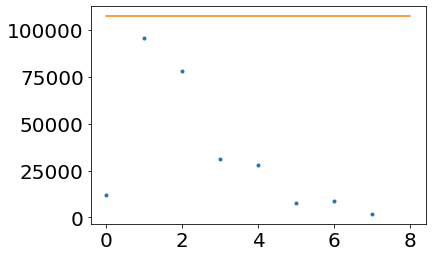

In [32]:
dnames, drange, dsubs = zip(*datasets)
plt.plot([x for x, xi in enumerate(dnames)], dsubs, ".")
plt.plot([0,len(dnames)],[nsubruns_min, nsubruns_min])
plt.show()

In [33]:
def plotDatasetsOverData(ax, drange, df, y):
    for i, (runstart, runend) in enumerate(drange):
        try:
            timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
            timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
            #print("hi")
            #ax.plot([10,12], [y,y])
            ax.plot([timestart, timeend], [y,y], linewidth=7)
        except:
            print("Unable to plot", runstart, runend)  
    return 0

def plotDatasetTimesOverData(ax, drange, y):
    for i, (timestart, timeend) in enumerate(drange):
        try:
            ax.plot([timestart, timeend], [y,y], linewidth=7)
        except:
            print("Unable to plot", runstart, runend)  
    return 0

def getTimesOfDatasets(drange, df):
    times = []
    for i, (runstart, runend) in enumerate(drange):
        try:
            timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
            timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
            #print("hi")
            #ax.plot([10,12], [y,y])
            times.append([timestart, timeend])
        except:
            print("Unable to plot", runstart, runend)  
    return times

In [34]:
drange_times = getTimesOfDatasets(drange, df)
#print(drange_times)

In [35]:
df.columns

Index(['run', 'startTime', 'stopTime', 'nEvents', 'quality',
       'AvgTemp_AllCalos', 'ctag', 'ctagPerFill', 'nSubRuns', 'AvgGain_Calo1',
       'AvgGain_Calo2', 'AvgGain_Calo3', 'AvgGain_Calo4', 'AvgGain_Calo5',
       'AvgGain_Calo6', 'AvgGain_Calo7', 'AvgGain_Calo8', 'AvgGain_Calo9',
       'AvgGain_Calo10', 'AvgGain_Calo11', 'AvgGain_Calo12', 'AvgGain_Calo13',
       'AvgGain_Calo14', 'AvgGain_Calo15', 'AvgGain_Calo16', 'AvgGain_Calo17',
       'AvgGain_Calo18', 'AvgGain_Calo19', 'AvgGain_Calo20', 'AvgGain_Calo21',
       'AvgGain_Calo22', 'AvgGain_Calo23', 'AvgGain_Calo24', 'runType',
       'duration', 'dqmCtagPerFill', 'nlCtagPerFill_Mark', 'nlFrac_Mark',
       'AvgTemp_Calo1', 'AvgTemp_Calo2', 'AvgTemp_Calo3', 'AvgTemp_Calo4',
       'AvgTemp_Calo5', 'AvgTemp_Calo6', 'AvgTemp_Calo7', 'AvgTemp_Calo8',
       'AvgTemp_Calo9', 'AvgTemp_Calo10', 'AvgTemp_Calo11', 'AvgTemp_Calo12',
       'AvgTemp_Calo13', 'AvgTemp_Calo14', 'AvgTemp_Calo15', 'AvgTemp_Calo16',
       'AvgTemp_Calo

In [36]:
df['ctagOverT0_Brynn'] = df['ctag'] / df['t0_tubea_total_integral']

In [37]:
df['ctagOverT0_Mark'] = df['nlCtagPerFill_Mark'] / df['t0_tubea_total_integral']

In [38]:
df2.columns

Index(['N6', 'N6_var', 'NQ', 'NQ_var', 'S6', 'S6_var', 'SQ', 'SQ_var',
       'deltaMagnetCycle', 'dipole', 'dipole_var', 'endTime',
       'feedbackCurrent_mA', 'feedbackCurrent_var', 'magnetCycleSimon',
       'startTime', 'trolleyRun', 'trolleyRunSimon', 'yokeTemp',
       'yokeTemp_Gradient', 'yokeTemp_Gradient_var', 'yokeTemp_var',
       'stopTime'],
      dtype='object')

/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


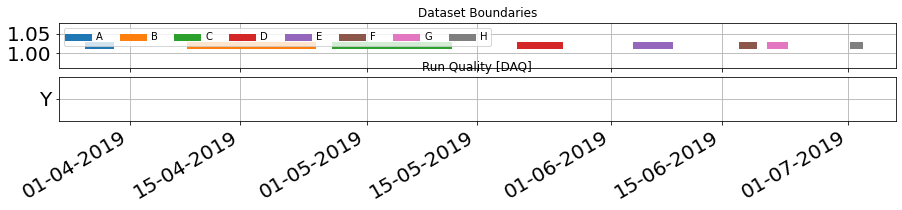

In [41]:
noint()
# plotX = 'startTime'
plotX = 'run'

runplots = [ #[todraw, title, ylim, duration?, numeric?]
    ['quality', 'Run Quality [DAQ]', [], False, False ],
#    ['runType', 'Run Quality [Mark]', [], False, False],
#    ['duration', 'Run Duration', [], False, True],
#    ['AvgTemp_Calo2', 'Average Temperature of Calo 2 [Centigrade]', [], False, True],
#    ['AvgGain_Calo2', 'Average NL Gain of Calo 2 [Sync Pulse Amplitude / Ref. Amplitude]', [0.9,2], False, True],
#    ['nlCtagPerFill_Mark', 'Average Nearline CTAG/Fill', [], False, True],
#    ['dqmCtagPerFill', 'Average DQM CTAG/Fill', [], False, True],
#    ['numberOfSubruns', 'Number of Subruns in This Run', [], False, True],
#    ['beamIntegral', 'T0 Beam Integral [Arb. Units]', [], False, True],
#    ['ctagOverT0_Brynn',"CTAG / T0 Integral (Tube A)", [], False, True],
#    ['t0_tubea_total_integral', 'T0 Beam Integral (Tube A, Nearline Data). [Arb. Units]', [], False, True],
#    ['ctag', 'CTAG [Arb. Units]', [], False, True],
#    ['ctagOverT0_Mark', 'CTAG/Fill / T0 (Tube A) [Arb. Units]', [], False, True]
#    ['beamTime', 'T0 Beam Time [c.t.]', [], False, True],
#    ['syncIntegral', 'T0 Sync Integral [Arb. Units]', [], False, True],
#    ['syncTime', 'T0 Sync Time [c.t.]', [], False, True],
#    ['trackerY', 'Tracker y-position [mm from center]', [], False, True],
#    ['caloYpos', 'Calo y-position (Excluding Calo 22) [mm from reference]', [], False, True],
#     ['kTotal', 'Total Kicker Strength [kV]', [], False, True],
#     ['wedgeChange', 'Change to Boron Carbide Wedge', [], False, True],
#    ['ibms1x_total_integral', 'IBMS 1X Integral (Nearline Data) [Arb. Units]', [], False, True],
#    ['ibms1x_centroid', 'IBMS 1X Centroid (Nearline Data) [Arb. Units]', [], False, True]
]

timeplots = [
#    ['dipole', 'Dipole [Hz]', [], True, True],
#    ['NQ', 'Normal Quadripole', [], True, True],
#    ['SQ', 'Skew Quadripole', [], True, True],
#    ['N6', 'Normal Sextipole', [], True, True],
#    ['S6', 'Skew Sextipole', [], True, True],
#    ['feedbackCurrent_mA', 'Feedback Current [mA]', [], True, True],
#    ['trolleyRunSimon', 'Trolley Runs', [], False, True],
#     ['deltaMagnetCycle', 'Trolley Run Times. 1 = First Trolley Run This Magnet Cycle', [], False, False]
]

nplots = len(runplots) + len(timeplots)

fig,ax = plt.subplots(nplots+1,1,figsize=(15,nplots*2),sharex=True, sharey=False)
for axi in ax:
    plt.sca(axi)
    plt.xticks(rotation=90)
    #plt.xticks
    axi.grid()
    
for axi in ax:
    axi.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
fig.autofmt_xdate() 

for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax[0].plot([timestart, timeend], [1.02,1.02],label=dnames[i], linewidth=7.0)
        ax[0].set_title("Dataset Boundaries")
    except:
        print("Unable to plot", runstart, runend)  
        
ax[0].legend(ncol=8)

for i, ding in enumerate(runplots):
    axi = ax[i+1]
    if(ding[4]):
        plotDatasetsOverData(axi, drange, df, df[ding[0]].mean())
    makeTrendPlot(axi, ding, df)
        
for i, ding in enumerate(timeplots):
    axi = ax[i+len(runplots)+1]
    if(ding[4]):
        #print(df2[ding[0]].mean())
        plotDatasetTimesOverData( axi, drange_times, pandas.to_numeric(df2[ding[0]], errors='coerce').mean() )
    makeTrendPlot(axi, ding, df2)


plt.xlim(pandas.to_datetime("23-03-2019"), pandas.to_datetime("07-07-2019"))
plt.tight_layout()
plt.savefig("/home/jlab/Desktop/dataset_ranges.png", dpi=600)
plt.savefig("/home/jlab/Desktop/dataset_ranges.eps", dpi=600)

plt.show()

2019-03-25 17:17:43 <DateOffset: days=14>
[Timestamp('2019-03-25 17:17:43'), Timestamp('2019-04-08 17:17:43'), Timestamp('2019-04-22 17:17:43'), Timestamp('2019-05-06 17:17:43'), Timestamp('2019-05-20 17:17:43'), Timestamp('2019-06-03 17:17:43'), Timestamp('2019-06-17 17:17:43'), Timestamp('2019-07-01 17:17:43')]
0 2019-03-25 17:17:43 2019-03-25 17:17:43
1 2019-04-08 17:17:43 2019-04-08 17:17:43
2 2019-04-22 17:17:43 2019-04-22 17:17:43
3 2019-05-06 17:17:43 2019-05-06 17:17:43
4 2019-05-20 17:17:43 2019-05-20 17:17:43
5 2019-06-03 17:17:43 2019-06-03 17:17:43
6 2019-06-17 17:17:43 2019-06-17 17:17:43
7 2019-07-01 17:17:43 2019-07-01 17:17:43


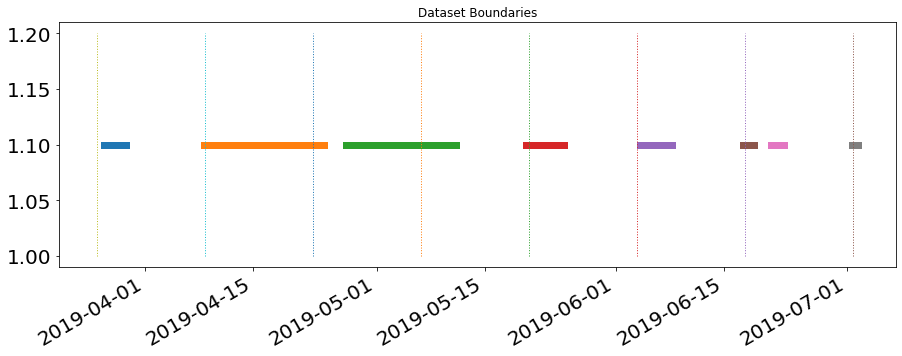

In [42]:
fig,ax = plt.subplots(figsize=(15,5))
for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax.plot([timestart, timeend], [1.1,1.1],label=dnames[i], linewidth=7.0)
        ax.set_title("Dataset Boundaries")
    except:
        print("Unable to plot", runstart, runend) 
        
fig.autofmt_xdate() 

timestart = pandas.to_datetime( df.loc[df['run'] == drange[0][0]]['startTime'] ).values[0]
timeend = pandas.to_datetime( df.loc[df['run'] == drange[len(drange)-1][1]]['stopTime'] ).values[0]

timestart = pandas.to_datetime(timestart - pandas.Timedelta(days=1))

print(timestart, pandas.DateOffset(days=14))
date_list = [pandas.to_datetime(timestart + pandas.Timedelta(days=14*x)) for x in range(8)]
print(date_list)
for i, date in enumerate(date_list):
    print(i,pandas.to_datetime(timestart + pandas.Timedelta(days=14*i)) , pandas.to_datetime(date) )
    #plt.plot([pandas.to_datetime( pandas.to_datetime(timestart + pandas.Timedelta(days=14*(i-1) )) ), pandas.to_datetime(date)], [1,1], ":", linewidth=1)
    plt.plot( [pandas.to_datetime(date), pandas.to_datetime(date)], [1,1.2], ":", linewidth=1)
plt.show()


[0.43774732522350873, 3.5108823098343835, 2.8685329034149203, 1.141689872490107, 1.0190532024036347, 0.28275685182471055, 0.32628609116224533, 0.06983731496409204]


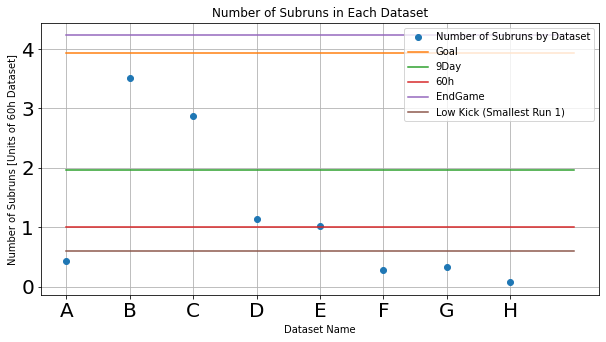

In [43]:
fig,ax = plt.subplots(figsize=(10,5))

#scalefactor = 1.
scalefactor = nsubruns_60h*1.0
#scalefactor = nsubruns_9day*1.0

plt.plot([x for x, xi in enumerate(dnames)], [x/scalefactor for x in dsubs], "o", label='Number of Subruns by Dataset')
print([x/scalefactor for x in dsubs])
plt.xticks([i for i in range(len(dnames))], dnames, rotation=0)

plt.plot([0,len(dnames)],[nsubruns_min/scalefactor, nsubruns_min/scalefactor], label="Goal")
plt.plot([0,len(dnames)],[nsubruns_9day/scalefactor, nsubruns_9day/scalefactor], label="9Day")
plt.plot([0,len(dnames)],[nsubruns_60h/scalefactor, nsubruns_60h/scalefactor], label="60h")
plt.plot([0,len(dnames)],[nsubruns_endgame/scalefactor, nsubruns_endgame/scalefactor], label="EndGame")
plt.plot([0,len(dnames)],[16330/scalefactor, 16330/scalefactor], label="Low Kick (Smallest Run 1)")
plt.legend(loc=1)

plt.grid()

plt.title("Number of Subruns in Each Dataset")
plt.xlabel("Dataset Name")
plt.ylabel("Number of Subruns [Units of 60h Dataset]")

#plt.yscale("log")
plt.savefig("/home/jlab/Desktop/dataset_sizes.png", dpi=600)
plt.show()

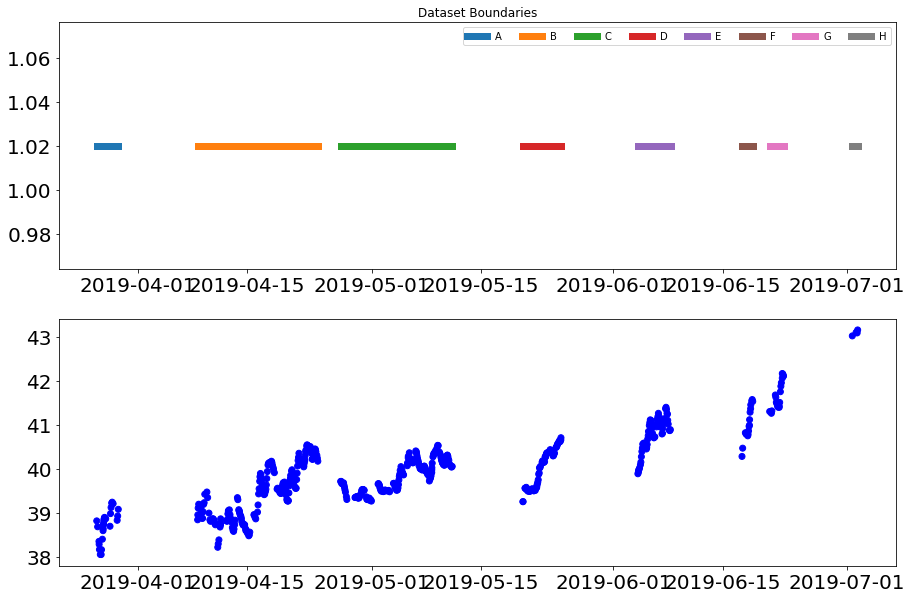

In [44]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(2,1, figsize=(15,10))

for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax[0].plot([timestart, timeend], [1.02,1.02],label=dnames[i], linewidth=7.0)
        ax[0].set_title("Dataset Boundaries")
    except:
        print("Unable to plot", runstart, runend)  
        
ax[0].legend(ncol=8)

colors = {'N':'red', 'Y':'blue', 'T':'green', 'C':'black'}
ax[1].scatter(pandas.to_datetime(df['startTime']), df['AvgTemp_Calo2'], c=df['quality'].apply(lambda x: colors[x]) )

plt.show()

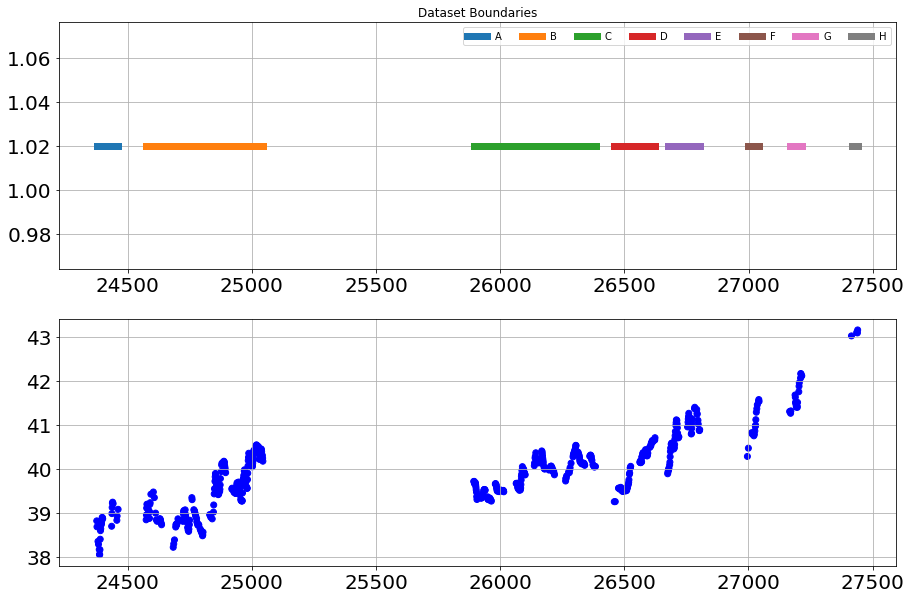

In [48]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(2,1, figsize=(15,10))

for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax[0].plot([runstart, runend], [1.02,1.02],label=dnames[i], linewidth=7.0)
        ax[0].set_title("Dataset Boundaries")
    except:
        print("Unable to plot", runstart, runend)  
        
ax[0].legend(ncol=8)

colors = {'N':'red', 'Y':'blue', 'T':'green', 'C':'black'}
ax[1].scatter((df['run']), df['AvgTemp_Calo2'], c=df['quality'].apply(lambda x: colors[x]) )

for axi in ax:
    axi.grid()

plt.show()

In [45]:
datasets_allRuns = []
for di in datasets:
    datasets_allRuns.append([di[0], []])
print(datasets_allRuns)

for i, entry in df.iterrows():
    run = entry['run']
    for j, di in enumerate(datasets):
        if(run >= di[1][0] and run <= di[1][1]):
            datasets_allRuns[j][1].append(run)

[['A', []], ['B', []], ['C', []], ['D', []], ['E', []], ['F', []], ['G', []], ['H', []]]


In [50]:
productions_datasets = [
    [24433,	24474],
    [24499,	24648],
    [24683,	25045],
    [25894,	26384],
    [25894,	26024],
    [26025,	26384],
    [26459,	26624],
    [26675,	26804],
    [26996,	27043],
    [27166,	27215],
    [27415,	27439]
]

A 24376 24462
B 24575 25045
C 25894 26384
D 26459 26624
E 26675 26804
F 26996 27043
G 27166 27215
H 27415 27439


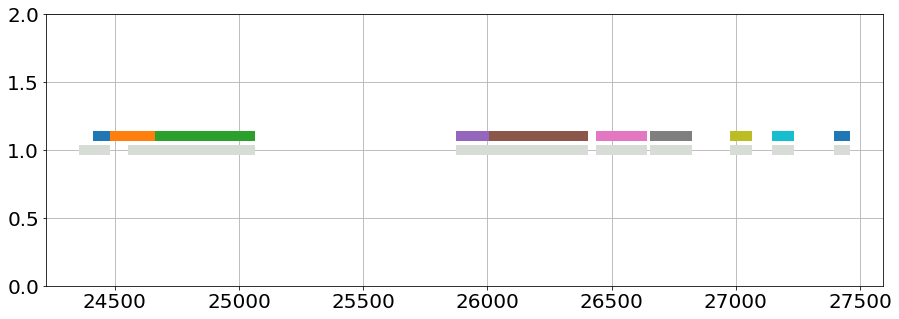

In [62]:
fig,ax = plt.subplots(figsize=(15,5))

for name, runs in datasets_allRuns:
    print(name, min(runs), max(runs))
    plt.plot([min(runs), max(runs)], [1,1], linewidth=10, color='xkcd:light grey')

for run1,run2 in productions_datasets:
    plt.plot([run1,run2], [1.1,1.1], linewidth=10)
    
plt.grid()
plt.ylim(0,2)
plt.show()

---

### 2D scatter plots